In [1]:
import pandas as pd
import numpy as np

In [2]:
user = pd.read_csv("D:\\machine learning\\ml-100k\\ml-100k\\u.data",sep="\t",names = ["user id", "movie id", "rating", "timestamp"])

In [3]:
user.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [4]:
item = pd.read_csv("D:\\machine learning\\ml-100k\\ml-100k\\u.item",sep="|",header=None, encoding='latin-1')

In [5]:
item.columns = ["movie id", "movie title", "release date", "video release date",
              "IMDb URL", "unknown", "Action" , "Adventure", "Animation",
              "Children's", "Comedy ", " Crime", " Documentary ", " Drama "," Fantasy ",
              "Film-Noir", "Horror ", " Musical ", " Mystery "," Romance ", " Sci-Fi ",
              "Thriller ", " War ", " Western "]

In [6]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11   Crime              1682 non-null   int64  
 12   Documentary        1682 non-null   int64  
 13   Drama              1682 non-null   int64  
 14   Fantasy            1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [7]:
user_info = pd.read_csv("D:\\machine learning\\ml-100k\\ml-100k\\u.user",sep="|",header=None)

In [8]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       943 non-null    int64 
 1   1       943 non-null    int64 
 2   2       943 non-null    object
 3   3       943 non-null    object
 4   4       943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [9]:
occ = pd.read_csv("D:\\machine learning\\ml-100k\\ml-100k\\u.occupation",sep="|",header=None)

In [10]:
occ.head()

,0
0,administrator
1,artist
2,doctor
3,educator
4,engineer


In [11]:
#data = pd.concat([user,item],axis=0)
#data = item.merge(user,on="movie id")
data = pd.merge(left=item, right=user, left_on='movie id', right_on='movie id')

In [12]:
#user.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie id            100000 non-null  int64  
 1   movie title         100000 non-null  object 
 2   release date        99991 non-null   object 
 3   video release date  0 non-null       float64
 4   IMDb URL            99987 non-null   object 
 5   unknown             100000 non-null  int64  
 6   Action              100000 non-null  int64  
 7   Adventure           100000 non-null  int64  
 8   Animation           100000 non-null  int64  
 9   Children's          100000 non-null  int64  
 10  Comedy              100000 non-null  int64  
 11   Crime              100000 non-null  int64  
 12   Documentary        100000 non-null  int64  
 13   Drama              100000 non-null  int64  
 14   Fantasy            100000 non-null  int64  
 15  Film-Noir           100000 non-null

In [13]:
data.dropna(axis=1, inplace = True)

### Here we removed the columns containing na values from the dataframe
### The columns containing na values which are release date, video release date and url has little impact on our recommendation system

In [14]:
data.head()

,movie id,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,66,3,883601324


In [15]:
avg_rating = data.groupby("movie title")["rating"].mean()
print(avg_rating)

movie title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64


In [16]:
count_rating = data.groupby("movie title")["rating"].count()
print(count_rating)

movie title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64


In [24]:
rating = pd.merge(left=avg_rating, right=count_rating, left_on="movie title", right_on="movie title")
rating.columns=["rating","rating count"]
print(rating)

                                         rating  rating count
movie title                                                  
'Til There Was You (1997)              2.333333             9
1-900 (1994)                           2.600000             5
101 Dalmatians (1996)                  2.908257           109
12 Angry Men (1957)                    4.344000           125
187 (1997)                             3.024390            41
...                                         ...           ...
Young Guns II (1990)                   2.772727            44
Young Poisoner's Handbook, The (1995)  3.341463            41
Zeus and Roxanne (1997)                2.166667             6
unknown                                3.444444             9
Á köldum klaka (Cold Fever) (1994)     3.000000             1

[1664 rows x 2 columns]


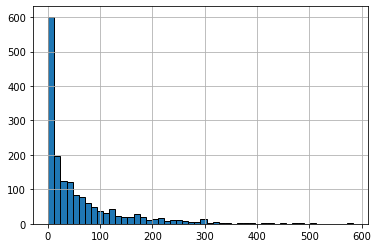

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['patch.force_edgecolor'] = True
rating['rating count'].hist(bins=50)

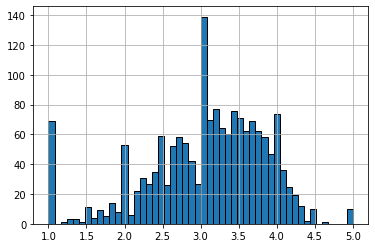

In [26]:
rating["rating"].hist(bins=50)

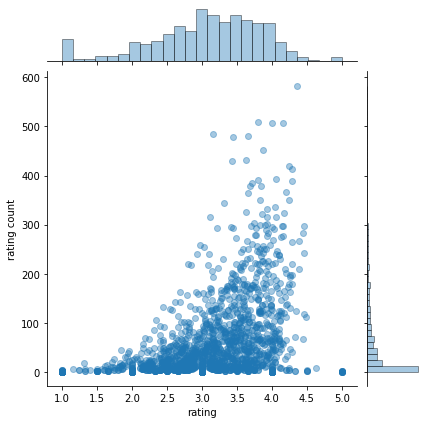

In [27]:
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x="rating",y="rating count",data=rating,alpha=0.4)

In [28]:
user_movie_rating = data.pivot_table(index="user id",columns="movie title",values="rating")
user_movie_rating.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


## Now I will select a movie at random to test the recommender system.
## I will choose 12 Angry Men

In [33]:
correlation = user_movie_rating.corrwith(user_movie_rating["12 Angry Men (1957)"])
print(correlation)

movie title
'Til There Was You (1997)               -0.500000
1-900 (1994)                                  NaN
101 Dalmatians (1996)                   -0.049890
12 Angry Men (1957)                      1.000000
187 (1997)                               0.666667
                                           ...   
Young Guns II (1990)                    -0.361961
Young Poisoner's Handbook, The (1995)    0.144338
Zeus and Roxanne (1997)                  1.000000
unknown                                  1.000000
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64


In [40]:
recommendation=pd.DataFrame(correlation,columns=["Correlation"])
recommendation.dropna(inplace=True)
recommendation=recommendation.join(rating["rating count"])
recommendation

,Correlation,rating count
movie title,,
'Til There Was You (1997),-0.500000,9
101 Dalmatians (1996),-0.049890,109
12 Angry Men (1957),1.000000,125
187 (1997),0.666667,41
2 Days in the Valley (1996),0.256625,93
...,...,...
Young Guns (1988),0.068944,101
Young Guns II (1990),-0.361961,44
"Young Poisoner's Handbook, The (1995)",0.144338,41


## Now we will put a filter where the rating count should be greater than 100 so that we can filter out those movies which have high correlation but have less user ratings which might give a wrong reccomendation

In [49]:
recc = recommendation[recommendation["rating count"]>100].sort_values('Correlation',ascending=False)
recc.head(10)

,Correlation,rating count
movie title,,
12 Angry Men (1957),1.000000,125
Ulee's Gold (1997),0.619544,184
Rear Window (1954),0.570513,209
Seven Years in Tibet (1997),0.549939,155
Clerks (1994),0.528173,148
Singin' in the Rain (1952),0.520844,137
Vertigo (1958),0.509460,179
Army of Darkness (1993),0.477251,116
Mr. Smith Goes to Washington (1939),0.470078,105


## From the above table we can see the top 10 recommendations to watch movie after you have  watched 12 angry  men